In [8]:
import caffe
import numpy as np
import matplotlib.pyplot as plt
import sys

%matplotlib inline

caffe.set_device(0)
caffe.set_mode_gpu()

In [9]:
# solver_path = 'model/compression/baseline/baseline_solver.prototxt'

solver_path = 'model/compression/ssim/baseline/ssim_solver.prototxt'

# solver_path = 'model/compression/ssim/with_imp/ssim_solver.prototxt'

In [11]:
solver = caffe.get_solver(solver_path)

# Fine-Tune
# weights = 'model/compression/with_imp/snaps_v2/imp_3_iter_2000.caffemodel'
# weights = 'model/compression/with_imp/snaps/imp_v2__iter_20000.caffemodel'
# weights = 'model/compression/with_imp/snaps/compare/1_iter_18000.caffemodel'
# weights = 'model/compression/baseline/snaps/baseline_v1__iter_200000.caffemodel'
# weights = 'model/compression/with_imp/snaps/compare/2_2_iter_220000.caffemodel'
# weights = 'model/compression/with_imp/snaps/compare/3_iter_180000.caffemodel'

# weights = 'model/compression/ssim/baseline/snaps/v1/baseline_iter_200000.caffemodel'
# weights = 'model/compression/ssim/baseline/snaps/v3/baseline_iter_200000.caffemodel'

# weights = 'model/compression/ssim/baseline/snaps/new_v1/baseline_iter_200000.caffemodel'
# solver.net.copy_from(weights)
# solver.restore('model/compression/with_imp/snaps/compare/2_2_iter_180000.solverstate')

# solver.restore('model/compression/with_imp/snaps/compare/3_iter_180000.solverstate')

weights = 'model/compression/ssim/baseline/snaps/16_8/baseline_v2_iter_200000.caffemodel'
solver.net.copy_from(weights)

In [12]:
# !cat 'model/compression/baseline/baseline_solver.prototxt'
# !cat 'model/compression/with_imp/with_imp_solver.prototxt'
!cat 'model/compression/ssim/baseline/ssim_solver.prototxt'
# !cat 'model/compression/ssim/with_imp/ssim_solver.prototxt'

net: "./model/compression/ssim/baseline/ssim.prototxt"
type: "Adam"
momentum: 0.9
momentum2: 0.999
delta: 0.00000001
base_lr: 0.000001
lr_policy: "fixed"
display: 100
test_interval: 1000
test_iter: 1
# max_iter: 100000
snapshot: 20000
snapshot_prefix: "./model/compression/ssim/baseline/snaps/16_8/baseline_v3"
solver_mode: GPU

In [13]:
# !cat "./model/compression/with_imp/with_imp_v2.prototxt"
!cat "./model/compression/ssim/baseline/ssim.prototxt"
# !cat "./model/compression/ssim/with_imp/ssim.prototxt"

layer {
  name: "data"
  type: "Data"
  top: "data"
  transform_param {
    scale: 0.0078431372549
    mean_value: 127.5
    mean_value: 127.5
    mean_value: 127.5
  }
  include {
    phase: TRAIN
  }
  data_param {
    source: "/home/snk/Documents/Research/image_compression_snk/data/img_lmdb"
    batch_size: 32
    backend: LMDB
  }
}


layer {
  name: "data"
  type: "Data"
  top: "data"
  transform_param {
    scale: 0.0078431372549
    mean_value: 127.5
    mean_value: 127.5
    mean_value: 127.5
  }
  include {
    phase: TEST
  }
  data_param {
    source: "/home/snk/Documents/Research/image_compression_snk/data/test_img_lmdb"
    batch_size: 32
    backend: LMDB
  }
}


layer {
  name: "conv1"
  type: "Convolution"
  bottom: "data"
  top: "conv1"
  convolution_param {
    num_output: 128
    pad: 2
    kernel_size: 8
    stride: 4
    weight_filler {
      type: "xavier"
    }
  }
}

layer {
  name: "conv1_relu"
  type: "ReLU"
  bottom: "conv1"
  top: "conv1"
}

layer {
  name: 

In [14]:
niter = 200000
test_interval = 500
train_loss = np.zeros(niter)
test_loss = np.zeros(int(np.ceil(niter / test_interval)))

Iteration: 0
train loss = 55.4047851562
test loss = 52.1751708984

Iteration: 500
train loss = 61.0212402344
test loss = 48.8831787109

Iteration: 1000
train loss = 82.4424438477
test loss = 48.7190551758

Iteration: 1500
train loss = 69.2124633789
test loss = 50.2485961914

Iteration: 2000
train loss = 61.4188842773
test loss = 48.8908081055

Iteration: 2500
train loss = 55.5883789062
test loss = 50.3375244141

Iteration: 3000
train loss = 58.0531005859
test loss = 50.4080810547

Iteration: 3500
train loss = 59.3480834961
test loss = 48.8574829102

Iteration: 4000
train loss = 67.7907104492
test loss = 47.7570800781

Iteration: 4500
train loss = 62.4705200195
test loss = 53.2458496094

Iteration: 5000
train loss = 72.5356445312
test loss = 51.005859375

Iteration: 5500
train loss = 66.0991210938
test loss = 49.6295166016

Iteration: 6000
train loss = 70.2521972656
test loss = 50.1735839844

Iteration: 6500
train loss = 60.4351196289
test loss = 48.8402709961

Iteration: 7000
train los

Iteration: 58500
train loss = 68.517578125
test loss = 50.9050292969

Iteration: 59000
train loss = 47.8673095703
test loss = 51.236328125

Iteration: 59500
train loss = 60.7058105469
test loss = 47.1303710938

Iteration: 60000
train loss = 64.4556884766
test loss = 48.100769043

Iteration: 60500
train loss = 47.4194946289
test loss = 50.4312744141

Iteration: 61000
train loss = 67.6220703125
test loss = 49.5358276367

Iteration: 61500
train loss = 60.3210449219
test loss = 50.9284667969

Iteration: 62000
train loss = 58.3574829102
test loss = 50.7237548828

Iteration: 62500
train loss = 58.1527099609
test loss = 49.853515625

Iteration: 63000
train loss = 56.869934082
test loss = 49.3787841797

Iteration: 63500
train loss = 55.8555908203
test loss = 49.7543945312

Iteration: 64000
train loss = 62.1385498047
test loss = 52.9743652344

Iteration: 64500
train loss = 68.3973388672
test loss = 46.6854858398

Iteration: 65000
train loss = 61.81640625
test loss = 48.8862304688

Iteration: 65

Iteration: 116500
train loss = 80.9532470703
test loss = 50.1005859375

Iteration: 117000
train loss = 61.9891357422
test loss = 48.7757568359

Iteration: 117500
train loss = 71.2328491211
test loss = 50.2057495117

Iteration: 118000
train loss = 67.3618774414
test loss = 50.2174682617

Iteration: 118500
train loss = 60.9646606445
test loss = 48.7528076172

Iteration: 119000
train loss = 64.2642822266
test loss = 47.4378662109

Iteration: 119500
train loss = 98.4499511719
test loss = 53.0128173828

Iteration: 120000
train loss = 60.0647583008
test loss = 50.8869018555

Iteration: 120500
train loss = 81.8079833984
test loss = 49.1910400391

Iteration: 121000
train loss = 59.7434082031
test loss = 49.7530517578

Iteration: 121500
train loss = 59.4066162109
test loss = 48.7269287109

Iteration: 122000
train loss = 50.0707397461
test loss = 49.6691894531

Iteration: 122500
train loss = 52.2571411133
test loss = 50.0672607422

Iteration: 123000
train loss = 70.6882324219
test loss = 50.4475

Iteration: 174000
train loss = 75.4399414062
test loss = 50.9704589844

Iteration: 174500
train loss = 83.373046875
test loss = 47.1650390625

Iteration: 175000
train loss = 62.7713623047
test loss = 48.0202026367

Iteration: 175500
train loss = 67.0547485352
test loss = 50.3613891602

Iteration: 176000
train loss = 60.3209228516
test loss = 49.5504760742

Iteration: 176500
train loss = 66.5238647461
test loss = 50.7344970703

Iteration: 177000
train loss = 69.9106445312
test loss = 50.5178222656

Iteration: 177500
train loss = 77.74609375
test loss = 49.6684570312

Iteration: 178000
train loss = 69.6729736328
test loss = 49.1774291992

Iteration: 178500
train loss = 68.8796386719
test loss = 49.5371704102

Iteration: 179000
train loss = 41.7849121094
test loss = 52.9456787109

Iteration: 179500
train loss = 75.1634521484
test loss = 46.5026245117

Iteration: 180000
train loss = 48.0041503906
test loss = 49.04296875

Iteration: 180500
train loss = 58.926940918
test loss = 49.9209594727

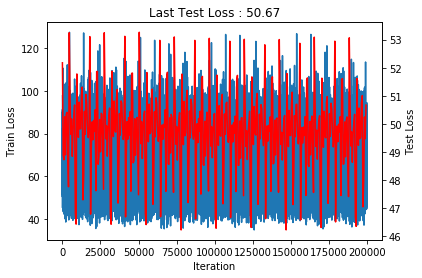

In [15]:
for it in range(niter):
    solver.step(1)
    train_loss[it] = solver.net.blobs['loss'].data
#     print 'train_loss =', train_loss[it]
    if it % test_interval == 0:
        solver.test_nets[0].forward()
        test_loss[it // test_interval] = solver.test_nets[0].blobs['loss'].data
        print 'Iteration: %d' % it
        print 'train loss = %s\ntest loss = %s\n' % (train_loss[it], test_loss[it // test_interval] )
#         print 'train loss = %s\ntest loss = %s\nrate loss = %s\n\n' % (train_loss[it], test_loss[it // test_interval],solver.test_nets[0].params['imap'][0].data[0,0,0,0] )
        sys.stdout.flush()
#         print 'Iteration', it, ' test loss = %s   rate loss = %s' % (test_loss[it // test_interval], solver.test_nets[0].params['imap'][0].data[0,0,0,0] )
_, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(np.arange(niter), train_loss)
# 红: test  蓝: train
ax2.plot(test_interval * np.arange(len(test_loss)), test_loss, 'r')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Train Loss')
ax2.set_ylabel('Test Loss')
ax2.set_title('Last Test Loss : {:.2f}'.format(test_loss[-1]))